<a href="https://colab.research.google.com/github/MohamedElashri/HEP-ML/blob/master/MiniBooNE_Particle_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MiniBooNE Particle Identification Dataset


  * The dataset has been taken from [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification)
  * It has been taken from the MiniBooNE experiment conducted in the fermilab.
  * A stream of muon neutrinos are fired and the detector measures the precense of electron neutrinos(signal) among the muon neutrinos(noise).
  * There are 50 features in the dataset related to every detection made , however no information is given about the features.
  * There are no missing values.
  * The first line in the file MiniBooNE_PID.txt contains 2 space seperated values ,   the signal events come first, followed by the background events
  * This is a binary classification problem where we want to tell wether a given signal is a electron neutrino or not.

### Downloading data

In [1]:
! wget -O data.txt -nc --no-check-certificate  https://archive.ics.uci.edu/ml/machine-learning-databases/00199/MiniBooNE_PID.txt

File ‘data.txt’ already there; not retrieving.


### Data Processing



  * The data is stored in data.txt which was downloaded from the above link.
  * We use the pandas library to read the data and skip the first row as it contains the number of positive and negative labels
  * Then we create a numpy array of 1's(electron neutrino) and 0's(muon neutrino) which acts as our labels for the classification problem.
  * We then convert the input dataframe into a numpy array for the analysis.
  * After having a look at the data we see that there are many features having large values. This makes the Machine Learning algorithms difficult to converge to a result. Therefore, the solution is to scale down the data
  * Here, we just want the range to change, not the mean, or the variance so that the data still caries the information it did before scaling. Hence a good scaler to use is the minmax scaler.
  * We then use the train test split to split the data into training and test data sets with a default of 75% training data and 25% test data.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [3]:
# define data and read it into pandas dataframe

df=pd.read_csv('data.txt',sep=' ',header=None,skiprows=1,skipinitialspace=True)

In [5]:
# explore data features 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.8850,0.928671,0.140918,2.58663,1689.070,1.197950,19.3561,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.22299,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.7180,0.882784,0.368855,2.24638,1388.260,0.839230,6.6951,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.31717,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.3960,0.412250,0.434002,2.38485,992.098,0.514175,16.0030,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.18765,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.8656,0.833067,0.181294,2.49837,1289.160,0.630307,12.9374,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.70034,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.6680,0.398421,0.353034,2.04136,949.231,0.389585,13.9175,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.68793,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [6]:
# scale the data 

file=open('data.txt')
y=file.readline()
file.close()
numlabels=[int(s) for s in y.split()]
ylabels=numlabels[0]*[1] + numlabels[1]*[0]
Y=np.array(ylabels)
X=df.to_numpy()
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [7]:
# split the dataset into traning and test sets 
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,random_state=0)

### Evaulation 

We define a function for model evaluation based on the confusion matrix. The confusion matrix is used to quantify how many of the predicted values were correct and incorrect. 

#### Definitions
* **Accuracy**: The number of true predictions(true 0's and true 1's) divided by the total number of predictions made
* **Precicion**: The number of true 1's divided by the total number of 1's predicted.(Basically telling us that how well have we predicted the 1's) precision=1 if no 1's are predicted as 0 (precision=TP/(TP+FP))
* **Recall**: The number of true 1's divided by the actual 1's.(the fraction of correctly classified 1's) . recall=1 if no 1s are predicted as 0.(recall=TP/(TP+FN))
* **ROC**: a graph where false positive rate is plotted on the X-axis and true positive rate is plotted in the Y axis. The area under the ROC curve is a good measure of how well the algorothm has performed. A score close to 1 is a good auc(area under the curve) score.


In [8]:
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate(y_test,y_pred,y_pred_proba):
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    print('The confusion matrix for the given model is: ')
    print(cnf_matrix)
    print('accuracy : ',metrics.accuracy_score(y_test,y_pred))
    print('precision : ',metrics.precision_score(y_test,y_pred))
    print('recall : ',metrics.recall_score(y_test,y_pred))
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr,tpr,label='Area under the curve= '+str(auc))
    plt.legend(loc=4)
    plt.title('ROC curve')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive rate')

### Models


In this analysis we will try different machine learning algorithm and seek the best model among them. We will use the following models 



1.   Logistic regression
2.   K-nearest Neigbhors
3.   Decision trees
4.   SVM (Support Vector Machines)
5.   Random Forest





#### Logistic regression

Logistic regression uses the sigmoid function to estimate the probability of an instance being classified as 1. The C value controls large values for weights that may lead to overfitting in the data

The score for this model is:  0.8730778693566245
the best value of parameter C is:  {'C': 100}
The confusion matrix for the given model is: 
[[22184  1268]
 [ 2859  6205]]
accuracy :  0.8730778693566245
precision :  0.8303224943128596
recall :  0.684576345984113


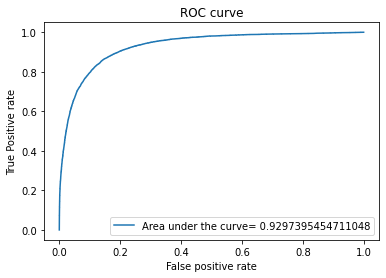

In [ ]:
from sklearn.linear_model import LogisticRegression

# define the model
lr=LogisticRegression(random_state=0,max_iter=5000)
C_range={'C':[100]}
clf=GridSearchCV(lr,C_range).fit(X_train,y_train)
# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameter C is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

#### K-nearest Neigbhors


The K-nearest neighbors model does not actually train a model based on the data but rather stores all the training data given to it and then calculates the distance of each point from every other point.When test data is given, it classifies it as a 1 or 0 based on votes based on the chosen k(number of nearest neighbors). It is unsupervised learning algorithm 

The score for this model is:  0.8901463894697995
the best value of parameters is:  {'n_neighbors': 14}
The confusion matrix for the given model is: 
[[21821  1631]
 [ 1941  7123]]
accuracy :  0.8901463894697995
precision :  0.8136851724925748
recall :  0.785856134157105


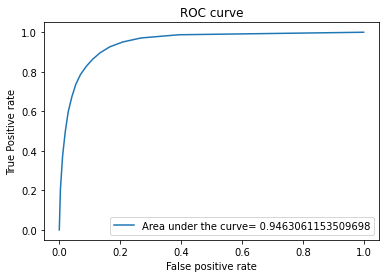

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# define the model
knn=KNeighborsClassifier()
parameters_knn={'n_neighbors':[1,5,10,14]}
clf=GridSearchCV(knn,parameters_knn).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

#### Decision Trees

A Binary Decision Tree is a structure based on a sequential decision process. Starting from the root, a feature is evaluated and one of the two branches is selected. This procedure is repeated until a final leaf is reached, which normally represents the classification target we are looking for. The model can overfit if no limit is specified on the depth the tree can go to.

The score for this model is:  0.908721860007381
the best value of parameters is:  {'max_depth': 10}
The confusion matrix for the given model is: 
[[21899  1553]
 [ 1415  7649]]
accuracy :  0.908721860007381
precision :  0.8312323407954793
recall :  0.8438879082082965


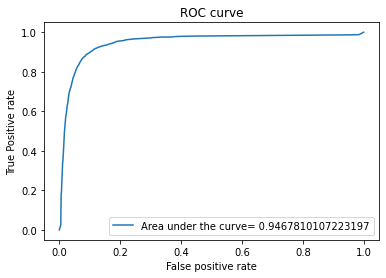

In [ ]:
from sklearn import tree

# define the model
dt=tree.DecisionTreeClassifier()
parameters_dt={'max_depth':[5,10,15]}
clf=GridSearchCV(dt,parameters_dt).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

#### SVM (Support Vector Machines)

SVM is binary classification algorithm. Given a set of points of 2 types in N dimensional place, SVM generates a (N — 1) dimensional hyperplane to separate those points into 2 groups. Say you have some points of 2 types in a paper which are linearly separable. SVM will find a straight line which separates those points into 2 types and situated as far as possible from all those points.

In [ ]:
from sklearn.svm import SVC

# define the model
rf=SVC(kernel='linear',probability = True, cache_size = 600)
parameters_rf={'C':[0.001, 0.1, 10, 100, 1000]}
clf=GridSearchCV(rf,parameters_rf,cv= 10,n_jobs=-1).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

# omitted output as it takes too long but given enough time it should be done

#### Random Forest 

random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

The score for this model is:  0.925544347398204
the best value of parameters is:  {'max_depth': 10, 'max_samples': 40000, 'n_estimators': 100}
The confusion matrix for the given model is: 
[[22346  1106]
 [ 1315  7749]]
accuracy :  0.925544347398204
precision :  0.8750988142292491
recall :  0.8549205648720212


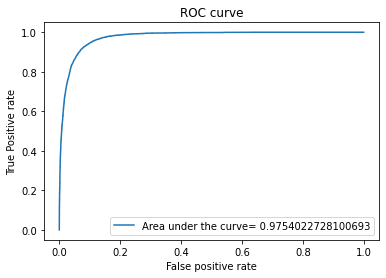

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define the model
rf=RandomForestClassifier(bootstrap=True)
parameters_rf={'n_estimators':[10,50,100],'max_depth':[5,10],'max_samples':[30000,40000]}
clf=GridSearchCV(rf,parameters_rf).fit(X_train,y_train)

# print model scores
print('The score for this model is: ',clf.score(X_test,y_test))
print('the best value of parameters is: ',clf.best_params_)
y_pred=clf.predict(X_test)
y_pred_proba=clf.predict_proba(X_test)[::,1]

# evaluate the model
evaluate(y_test,y_pred,y_pred_proba)

### Conclusion 

In our Analysis we find "" is the best algorithm with the highest ROC value 